In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)

In [2]:
df = pd.read_csv('extractedData.csv')
df.head()

,sunroof,alloywheels,aircondition,nav,bluetooth,pushstart,parkingassist,cruisecontrol,trailerhitch,url,...,colour,body,doors,seating,transmission,fuel,km,description,carfax,vin
0,1,1,1,0,0,0,0,1,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Grey,"SUV, Crossover",NaN,NaN,Automatic,Gasoline,"384,900",3rd Gen Toyota 4RunnerRunning strong at 385k. ...,NaN,NaN
1,1,1,1,0,0,0,0,1,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Blue,Wagon,5,5,Automatic,Gasoline,"239,000","Subaru Outback 2005 2.5, 170 hp. With 239000 k...",NaN,NaN
2,0,1,1,0,0,1,0,0,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Grey,Sedan,4,5,Manual,NaN,"28,200",2008 Mitsubishi Lancer Evolution X GSR\r\nPhan...,NaN,NaN
3,1,1,1,0,0,0,1,1,1,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Red,Other,2,2,Manual,Gasoline,399,Certified International Flatbed Truck- Low km!...,NaN,NaN
4,0,0,1,0,1,1,0,0,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Silver,Sedan,4,5,Automatic,Gasoline,"66,000","10,900 or best offer\r\nMazda3 CX in amazing c...",NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sunroof        4460 non-null   int64  
 1   alloywheels    4460 non-null   int64  
 2   aircondition   4460 non-null   int64  
 3   nav            4460 non-null   int64  
 4   bluetooth      4460 non-null   int64  
 5   pushstart      4460 non-null   int64  
 6   parkingassist  4460 non-null   int64  
 7   cruisecontrol  4460 non-null   int64  
 8   trailerhitch   4460 non-null   int64  
 9   url            4460 non-null   object 
 10  title          4449 non-null   object 
 11  price          4064 non-null   object 
 12  condition      4449 non-null   object 
 13  year           4449 non-null   float64
 14  make           4449 non-null   object 
 15  model          4449 non-null   object 
 16  trim           2196 non-null   object 
 17  colour         3709 non-null   object 
 18  body    

In [4]:
# We need to remove listings that have no price or total km on engine because then it will be hard to gauge the value
df = df.drop_duplicates().dropna(how='all').dropna(subset=['km']).dropna(subset=['price'])
df.shape

(3593, 27)

In [5]:
df.price.head()

0     $3,850.00
1     $3,850.00
2    $39,500.00
3     $6,650.00
4    $10,900.00
Name: price, dtype: object

In [6]:
df.price = df.price.apply(lambda x: np.float(x.replace("$","").replace(",","")))

In [7]:
df.price.head()

0     3850.0
1     3850.0
2    39500.0
3     6650.0
4    10900.0
Name: price, dtype: float64

In [8]:
df.make.unique()

array(['Toyota', 'Subaru', 'Mitsubishi', 'International Harvester',
       'Mazda', 'Suzuki', 'Honda', 'Ford', 'BMW', 'Acura', 'Hyundai',
       'Volkswagen', 'Land Rover', 'Lexus', 'Chrysler', 'Smart',
       'Chevrolet', 'Dodge', 'Nissan', 'Infiniti', 'Audi', 'Kia', 'Jeep',
       'Mercedes-Benz', 'Pontiac', 'Buick', 'Jaguar', 'Scion', 'Cadillac',
       'Volvo', 'GMC', 'Lincoln', 'HUMMER', 'Saab', 'MINI', 'Other',
       'Porsche', 'Tesla', 'Fiat', 'Saturn', 'Ram', 'Oldsmobile',
       'Maserati', 'Bentley', 'Alfa Romeo', 'Mercury', 'Genesis',
       'Aston Martin', 'MG', 'Plymouth', 'Rolls-Royce'], dtype=object)

In [9]:
df[df.make == "Other"][['title','make','model','description']]

,title,make,model,description
280,CA$H FOR SCRAP CARS & FREE TOWING 6479798504,Other,Other,"SCRAP CARS REMOVAL . 647-979-8504\r\nToronto,O..."
314,Top cash paid for your used | unwanted | salva...,Other,Other,Hello folks.\r\nWe are offering a scrap car re...
412,Quality seat covers,Other,Other,Complete set includes two front and back seats...
1036,Food Truck For Sale | Call 5197218110,Other,Other,Call now: 5197218110Food truck for sale.Stainl...
2075,Two Coach bus sale for parts,Other,Other,Two used Coach Buses sale for parts. Both of t...
3032,Motorcycle ATV Snowmobile Jet Ski Utility Hydr...,Other,Other,Custom built roll off lift deck plate for all ...
3135,1984 Innocenti Mini De Tomaso Turbo,Other,Other,1984 Innocenti Mini De Tomaso Turbo\r\nVery ra...
3309,Slingshot SL,Other,Other,Like brand new comes with cover and two helmet...
3424,MOTUL & LIQUI MOLY 5l,Other,Other,We have MOTUL & LIQUI MOLY SYNTHETIC engine oi...
3648,Work Truck for Mobile Mechanic or Mobile Repai...,Other,Other,Year 2000 International 4900 Mobile Mechanic t...


In [10]:
df[df.make == "Other"][['title','make','model','description']].shape

(15, 4)

In [11]:
# These are services related to cars and not a car itself so we need to drop it
df = df.drop([280,314,412,1036,2075,3032,3424,3648,4020,4094,4312,4412])
df[df.make == "Other"][['make','model','description']].shape

(3, 3)

In [12]:
df[df.make == "Other"][['title','make','model','description']]

,title,make,model,description
3135,1984 Innocenti Mini De Tomaso Turbo,Other,Other,1984 Innocenti Mini De Tomaso Turbo\r\nVery ra...
3309,Slingshot SL,Other,Other,Like brand new comes with cover and two helmet...
4321,2005 Malibu Car For Sale,Other,Other,In good condition car. No issues just need to ...


In [13]:
# Manually update the make and models of these rows
df.loc[3135,'make'] = "Innocenti"
df.loc[3309,'make'] = "Slingshot"
df.loc[4321,'make'] = "Chevrolet"

df.loc[3135,'model'] = "Tomaso Turbo"
df.loc[3309,'model'] = "SL"
df.loc[4321,'model'] = "Malibu"

In [14]:
df.loc[[3135,3309,4321]][['make','model']]

,make,model
3135,Innocenti,Tomaso Turbo
3309,Slingshot,SL
4321,Chevrolet,Malibu


In [15]:
df = df[df.make !='International Harvester']
df.make.unique()

array(['Toyota', 'Subaru', 'Mitsubishi', 'Mazda', 'Suzuki', 'Honda',
       'Ford', 'BMW', 'Acura', 'Hyundai', 'Volkswagen', 'Land Rover',
       'Lexus', 'Chrysler', 'Smart', 'Chevrolet', 'Dodge', 'Nissan',
       'Infiniti', 'Audi', 'Kia', 'Jeep', 'Mercedes-Benz', 'Pontiac',
       'Buick', 'Jaguar', 'Scion', 'Cadillac', 'Volvo', 'GMC', 'Lincoln',
       'HUMMER', 'Saab', 'MINI', 'Porsche', 'Tesla', 'Fiat', 'Saturn',
       'Ram', 'Oldsmobile', 'Maserati', 'Bentley', 'Alfa Romeo',
       'Mercury', 'Genesis', 'Innocenti', 'Aston Martin', 'Slingshot',
       'MG', 'Plymouth', 'Rolls-Royce'], dtype=object)

In [16]:
df[df.model == 'Other'][['title','make','model','description']]

,title,make,model,description
4,"2014 Mazda CX 66,000 KM ONLY",Mazda,Other,"10,900 or best offer\r\nMazda3 CX in amazing c..."
19,BMW 335i xDrive M-performance Edition,BMW,Other,2013 BMW 335i xDrive M-Performance Edition\r\n...
25,Honda Civic 2010 DX-G,Honda,Other,"Honda Civic for Sale Clean Car No Problems, Lo..."
35,Honda Civic 2009 DX-G,Honda,Other,2009 HONDA CIVIC DX-G\r\nThe car is in a very ...
182,2015 Volkswagen Jetta,Volkswagen,Other,"Runs and looks new, rustproofed every year, ne..."
...,...,...,...,...
4367,2006 Volkswagen Jetta 2.5L Manual Transmission,Volkswagen,Other,2006 Volkswagen Jetta 2.5L Manual Transmission...
4387,2016 Mercedes-Benz Sprinter 2500 170 High Roof...,Mercedes-Benz,Other,"2016 Mercedes Benz Sprinter passenger Van, in ..."
4413,"2007 doge minivan 130,000km",Chrysler,Other,2007 doge minvan for sale 4000\r\nCertified e ...
4423,Mint Pontiac Montana - only 110k! - Lowest mil...,Pontiac,Other,2005 Pontiac Montana for sale.\r\nSuper clean ...


In [17]:
df[df.model == 'Other'].make.unique()

array(['Mazda', 'BMW', 'Honda', 'Volkswagen', 'Chrysler', 'GMC',
       'Infiniti', 'Chevrolet', 'Fiat', 'Lexus', 'Cadillac', 'Toyota',
       'Subaru', 'MINI', 'Nissan', 'Jeep', 'Mitsubishi', 'Mercedes-Benz',
       'Ford', 'Audi', 'Acura', 'Hyundai', 'Dodge', 'Jaguar', 'Scion',
       'Saturn', 'Oldsmobile', 'Rolls-Royce', 'Pontiac'], dtype=object)

In [18]:
car_models = pd.read_csv("carmodels.csv")[['Make','Model']]
car_models.head()

,Make,Model
0,Audi,Q3
1,Cadillac,Escalade ESV
2,Chevrolet,Malibu
3,Chevrolet,Corvette
4,Acura,RLX


In [19]:
df.model.value_counts()

Other       220
Civic       163
3-Series    136
Accord       76
Corolla      66
           ... 
XJ12          1
Tracker       1
Stealth       1
Mirage        1
Q3            1
Name: model, Length: 480, dtype: int64

In [20]:
def model_imputation(x):
    make = x[14]
    model = x[15]
    description = x[24]
    title = x[10]
    if "other" in model.lower():
        same_make_car = car_models[car_models.Make == make]
        for car in same_make_car.values:
            if car[1] in description or car[1] in title:
                return car[1]
    return model

def transmission_imputation(x):
    model = x[15]
    description = x[24]
    transmission =x[21]
    if pd.isnull(transmission):
        trans = df[df.model==model].transmission.mode()

        if "automatic" in description.lower():
            return "Automatic"

        if "manual" in description.lower():
            return "Manual"
        
        if trans.shape[0] == 0:
            return "Other"
        
        # If there are mode than 1 mode result, pick a random mode value
        if trans.shape[0] >= 2:
            return np.random.choice(trans, 1)[0]

        return trans[0]
    
    return transmission

def colour_imputation(x):
    model = x[15]
    colour = x[17]
    
    if pd.isnull(colour):
        col = df[df.model==model].colour.mode()
        
        # If there are mode than 1 mode result, pick a random mode value
        if col.shape[0] >= 2:
            return np.random.choice(col,1)[0]
        
        if col.shape[0] == 0:
            return "Other"
        
        return col[0]
    return colour

def door_imputation(x):
    model = x[14]
    doors = x[19]
    
    if pd.isnull(doors):
        door = df[df.model == model].doors.mode()
        
        if door.shape[0] >= 2:
            return np.random.choice(door,1)[0]
        
        if door.shape[0] == 0:
            return "4"
        
        return door[0]
    return doors

def seat_imputation(x):
    model = x[14]
    seats = x[20]
    
    if pd.isnull(seats):
        seat = df[df.model == model].seating.mode()
        
        if seat.shape[0] >= 2:
            return np.random.choice(seat,1)[0]
        
        if seat.shape[0] == 0:
            return "5"
        
        return seat[0]
        
    return seats


def fuel_imputation(x):
    model = x[14]
    fuels = x[22]
    description = x[24]

    if pd.isnull(fuels):
        fuel = df[df.model == model].fuel.mode()
        
        if "electric" in description:
            return "Electric"
        
        if "hybrid-electric" in description:
            return "Hybrid-Electric"
        
        if "gasoline" in description or  fuel.shape[0] == 0:
            return "Gasoline"
        
        if "diesel" in description:
            return "Diesel"
            
        if fuel.shape[0] >= 2:
            return np.random.choice(fuel,1)[0]
    
        
        return fuel[0]
    
    return fuels
        

In [21]:
percent_of_nums = 100*df.isnull().sum(axis = 0)/df.shape[0]
percent_of_nums

sunroof           0.000000
alloywheels       0.000000
aircondition      0.000000
nav               0.000000
bluetooth         0.000000
pushstart         0.000000
parkingassist     0.000000
cruisecontrol     0.000000
trailerhitch      0.000000
url               0.000000
title             0.000000
price             0.000000
condition         0.000000
year              0.000000
make              0.000000
model             0.000000
trim             50.055897
colour           14.952487
body              0.000000
doors            16.741196
seating          23.029625
transmission      9.083287
fuel             27.920626
km                0.000000
description       0.000000
carfax           77.193963
vin              77.193963
dtype: float64

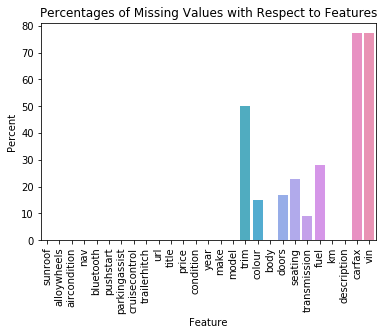

In [22]:
sns.barplot(x=percent_of_nums.index,y=percent_of_nums.values)
plt.xticks(rotation='vertical')
plt.title("Percentages of Missing Values with Respect to Features")
plt.ylabel("Percent")
plt.xlabel("Feature");

In [23]:
df.transmission = df.apply(transmission_imputation, axis=1)
df.model = df.apply(model_imputation, axis=1)
df.colour = df.apply(colour_imputation, axis=1)
df.doors = df.apply(door_imputation, axis=1)
df.seating = df.apply(seat_imputation, axis=1)
df.fuel = df.apply(fuel_imputation, axis=1)

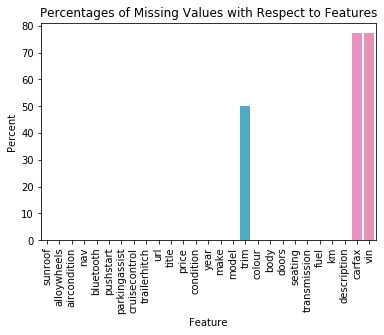

In [24]:
percent_of_nums = 100*df.isnull().sum(axis = 0)/df.shape[0]
sns.barplot(x=percent_of_nums.index,y=percent_of_nums.values)
plt.xticks(rotation='vertical')
plt.title("Percentages of Missing Values with Respect to Features")
plt.ylabel("Percent")
plt.xlabel("Feature");

In [25]:
df = df.drop(columns=['trim','vin','carfax'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3578 entries, 0 to 4459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sunroof        3578 non-null   int64  
 1   alloywheels    3578 non-null   int64  
 2   aircondition   3578 non-null   int64  
 3   nav            3578 non-null   int64  
 4   bluetooth      3578 non-null   int64  
 5   pushstart      3578 non-null   int64  
 6   parkingassist  3578 non-null   int64  
 7   cruisecontrol  3578 non-null   int64  
 8   trailerhitch   3578 non-null   int64  
 9   url            3578 non-null   object 
 10  title          3578 non-null   object 
 11  price          3578 non-null   float64
 12  condition      3578 non-null   object 
 13  year           3578 non-null   float64
 14  make           3578 non-null   object 
 15  model          3578 non-null   object 
 16  colour         3578 non-null   object 
 17  body           3578 non-null   object 
 18  doors   

In [35]:
df = df[df.seating!="Other"]
df = df[df.doors != "Other"]
df.seating = df.seating.astype('int32')
df.doors = df.doors.astype('int32')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3514 entries, 0 to 4459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sunroof        3514 non-null   int64  
 1   alloywheels    3514 non-null   int64  
 2   aircondition   3514 non-null   int64  
 3   nav            3514 non-null   int64  
 4   bluetooth      3514 non-null   int64  
 5   pushstart      3514 non-null   int64  
 6   parkingassist  3514 non-null   int64  
 7   cruisecontrol  3514 non-null   int64  
 8   trailerhitch   3514 non-null   int64  
 9   url            3514 non-null   object 
 10  title          3514 non-null   object 
 11  price          3514 non-null   float64
 12  condition      3514 non-null   object 
 13  year           3514 non-null   float64
 14  make           3514 non-null   object 
 15  model          3514 non-null   object 
 16  colour         3514 non-null   object 
 17  body           3514 non-null   object 
 18  doors   